In [1]:
import pandas as pd

orders = pd.read_csv("orders.csv")
orders.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [2]:
users = pd.read_json("users.json")
users.head()


,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [3]:
import sqlite3

conn = sqlite3.connect("restaurants.db")

with open("restaurants.sql", "r") as file:
    sql_script = file.read()

conn.executescript(sql_script)

restaurants = pd.read_sql("SELECT * FROM restaurants", conn)
restaurants.head()


,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [4]:
orders_users = pd.merge(
    orders,
    users,
    on="user_id",
    how="left"
)


In [5]:
final_df = pd.merge(
    orders_users,
    restaurants,
    on="restaurant_id",
    how="left"
)


In [6]:
final_df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [7]:
final_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   restaurant_id      10000 non-null  int64  
 3   order_date         10000 non-null  object 
 4   total_amount       10000 non-null  float64
 5   restaurant_name_x  10000 non-null  object 
 6   name               10000 non-null  object 
 7   city               10000 non-null  object 
 8   membership         10000 non-null  object 
 9   restaurant_name_y  10000 non-null  object 
 10  cuisine            10000 non-null  object 
 11  rating             10000 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 937.6+ KB


In [8]:
final_df.to_csv("final_food_delivery_dataset.csv", index=False)


In [10]:
final_df['order_date'] = pd.to_datetime(
    final_df['order_date'],
    dayfirst=True
)


In [11]:
final_df['order_date'].head()


0   2023-02-18
1   2023-01-18
2   2023-07-15
3   2023-10-04
4   2023-12-25
Name: order_date, dtype: datetime64[ns]

In [12]:
final_df.groupby(
    final_df['order_date'].dt.month
)['order_id'].count()


order_date
1     831
2     785
3     903
4     812
5     844
6     784
7     859
8     851
9     812
10    863
11    807
12    849
Name: order_id, dtype: int64

In [13]:
final_df['month'] = final_df['order_date'].dt.to_period('M')

final_df.groupby('month')['order_id'].count()


month
2023-01    804
2023-02    785
2023-03    903
2023-04    812
2023-05    844
2023-06    784
2023-07    859
2023-08    851
2023-09    812
2023-10    863
2023-11    807
2023-12    849
2024-01     27
Freq: M, Name: order_id, dtype: int64

In [14]:
final_df.groupby('membership')['order_id'].count()


membership
Gold       4987
Regular    5013
Name: order_id, dtype: int64

In [17]:
final_df.groupby('cuisine')['order_id'].count()


cuisine
Chinese    2418
Indian     2469
Italian    2532
Mexican    2581
Name: order_id, dtype: int64

In [20]:
final_df.groupby('membership')['order_id'].count()


membership
Gold       4987
Regular    5013
Name: order_id, dtype: int64

In [22]:
final_df.columns


Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating', 'month'],
      dtype='object')

In [23]:
final_df['month'] = final_df['order_date'].dt.to_period('M')


In [24]:
final_df.groupby('month')['order_id'].count()


month
2023-01    804
2023-02    785
2023-03    903
2023-04    812
2023-05    844
2023-06    784
2023-07    859
2023-08    851
2023-09    812
2023-10    863
2023-11    807
2023-12    849
2024-01     27
Freq: M, Name: order_id, dtype: int64

In [26]:
final_df.groupby('membership')['order_id'].count()


membership
Gold       4987
Regular    5013
Name: order_id, dtype: int64

In [27]:
final_df.groupby('city')['order_id'].count()


city
Bangalore    2751
Chennai      2469
Hyderabad    2350
Pune         2430
Name: order_id, dtype: int64

In [28]:
final_df.columns = final_df.columns.str.strip()


In [30]:
list(final_df.columns)


['order_id',
 'user_id',
 'restaurant_id',
 'order_date',
 'total_amount',
 'restaurant_name_x',
 'name',
 'city',
 'membership',
 'restaurant_name_y',
 'cuisine',
 'rating',
 'month']

In [31]:
final_df.columns = final_df.columns.str.strip()
final_df.columns = final_df.columns.str.lower()


In [32]:
list(final_df.columns)


['order_id',
 'user_id',
 'restaurant_id',
 'order_date',
 'total_amount',
 'restaurant_name_x',
 'name',
 'city',
 'membership',
 'restaurant_name_y',
 'cuisine',
 'rating',
 'month']

In [34]:
final_df = final_df.rename(columns={
    'order id': 'order_id',
    'user id': 'user_id',
    'restaurant id': 'restaurant_id',
    'order date': 'order_date',
    'price': 'amount'
})


In [36]:
list(final_df.columns)


['order_id',
 'user_id',
 'restaurant_id',
 'order_date',
 'total_amount',
 'restaurant_name_x',
 'name',
 'city',
 'membership',
 'restaurant_name_y',
 'cuisine',
 'rating',
 'month']

In [38]:
final_df.groupby('order_id')['total_amount'].sum().head()


order_id
1     842.97
2     546.68
3     163.93
4    1155.97
5    1321.91
Name: total_amount, dtype: float64

In [39]:
final_df.groupby('membership')['order_id'].count()


membership
Gold       4987
Regular    5013
Name: order_id, dtype: int64

In [40]:
final_df.groupby('membership')['total_amount'].sum()


membership
Gold       3975364.89
Regular    4036259.23
Name: total_amount, dtype: float64

In [41]:
final_df.groupby('membership')['total_amount'].mean()


membership
Gold       797.145556
Regular    805.158434
Name: total_amount, dtype: float64

In [42]:
final_df.groupby('city')['order_id'].count().sort_values(ascending=False)


city
Bangalore    2751
Chennai      2469
Pune         2430
Hyderabad    2350
Name: order_id, dtype: int64

In [44]:
final_df.groupby('city')['total_amount'].sum().sort_values(ascending=False)


city
Bangalore    2206946.58
Chennai      1990513.03
Pune         1924797.93
Hyderabad    1889366.58
Name: total_amount, dtype: float64

In [45]:
final_df.groupby('cuisine')['order_id'].count().sort_values(ascending=False)


cuisine
Mexican    2581
Italian    2532
Indian     2469
Chinese    2418
Name: order_id, dtype: int64

In [46]:
final_df.groupby('cuisine')['total_amount'].sum().sort_values(ascending=False)


cuisine
Mexican    2085503.09
Italian    2024203.80
Indian     1971412.58
Chinese    1930504.65
Name: total_amount, dtype: float64

In [47]:
final_df.groupby('month')['total_amount'].sum()


month
2023-01    645818.76
2023-02    630867.40
2023-03    716738.98
2023-04    666097.18
2023-05    668428.61
2023-06    610822.93
2023-07    688559.45
2023-08    694987.58
2023-09    653838.07
2023-10    699187.73
2023-11    637772.43
2023-12    681303.50
2024-01     17201.50
Freq: M, Name: total_amount, dtype: float64

<Axes: title={'center': 'Orders per Month'}, xlabel='Month', ylabel='Number of Orders'>

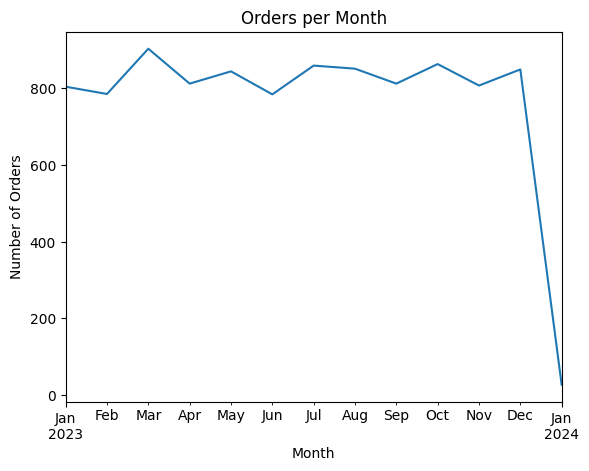

In [48]:
final_df.groupby('month')['order_id'].count().plot(
    title='Orders per Month',
    xlabel='Month',
    ylabel='Number of Orders'
)


<Axes: title={'center': 'Revenue by Membership'}, xlabel='membership', ylabel='Revenue'>

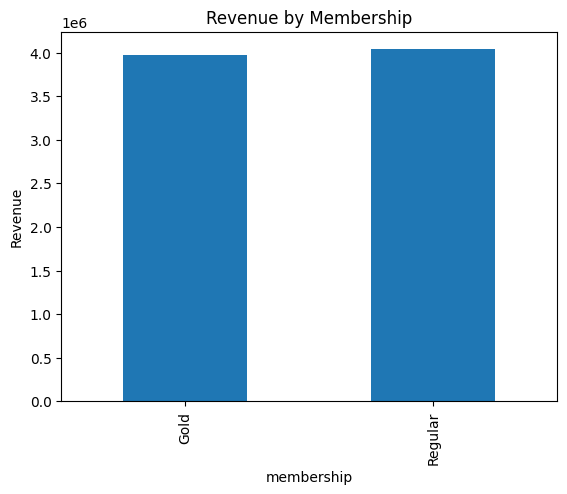

In [50]:
final_df.groupby('membership')['total_amount'].sum().plot(
    kind='bar',
    title='Revenue by Membership',
    ylabel='Revenue'
)


In [51]:
final_df.to_csv("final_food_delivery_dataset.csv", index=False)


In [52]:
final_df.shape
final_df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating,month
0,1,2508,450,2023-02-18,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2,2023-02
1,2,2693,309,2023-01-18,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5,2023-01
2,3,2084,107,2023-07-15,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0,2023-07
3,4,319,224,2023-10-04,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8,2023-10
4,5,1064,293,2023-12-25,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0,2023-12


In [54]:
gold_city_revenue = (
    final_df[final_df['membership'] == 'Gold']
    .groupby('city')['total_amount']
    .sum()
    .sort_values(ascending=False)
)

gold_city_revenue


city
Chennai      1080909.79
Pune         1003012.32
Bangalore     994702.59
Hyderabad     896740.19
Name: total_amount, dtype: float64

In [55]:
final_df.groupby('cuisine')['total_amount'].mean().sort_values(ascending=False)


cuisine
Mexican    808.021344
Italian    799.448578
Indian     798.466011
Chinese    798.389020
Name: total_amount, dtype: float64

In [57]:
user_total = final_df.groupby('user_id')['total_amount'].sum()

count_users = user_total[user_total > 1000].count()
count_users


np.int64(2544)

In [59]:
rating_bins = pd.cut(
    final_df['rating'],
    bins=[3.0, 3.5, 4.0, 4.5, 5.0],
    labels=['3.0–3.5', '3.6–4.0', '4.1–4.5', '4.6–5.0']
)

final_df.groupby(rating_bins)['total_amount'].sum().sort_values(ascending=False)


C:\Users\anish\AppData\Local\Temp\ipykernel_20284\2232451450.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_df.groupby(rating_bins)['total_amount'].sum().sort_values(ascending=False)


rating
4.6–5.0    2197030.75
4.1–4.5    1960326.26
3.0–3.5    1881754.57
3.6–4.0    1717494.41
Name: total_amount, dtype: float64

In [61]:
(
    final_df[final_df['membership'] == 'Gold']
    .groupby('city')['total_amount']
    .mean()
    .sort_values(ascending=False)
)


city
Chennai      808.459080
Hyderabad    806.421034
Bangalore    793.223756
Pune         781.162243
Name: total_amount, dtype: float64

In [63]:
restaurant_count = final_df.groupby('cuisine')['restaurant_id'].nunique()
revenue_by_cuisine = final_df.groupby('cuisine')['total_amount'].sum()

summary = pd.concat([restaurant_count, revenue_by_cuisine], axis=1)
summary.columns = ['restaurant_count', 'total_revenue']

summary.sort_values(['restaurant_count', 'total_revenue'])


,restaurant_count,total_revenue
cuisine,,
Chinese,120,1930504.65
Indian,126,1971412.58
Italian,126,2024203.80
Mexican,128,2085503.09


In [64]:
total_orders = final_df['order_id'].nunique()
gold_orders = final_df[final_df['membership'] == 'Gold']['order_id'].nunique()

percentage = round((gold_orders / total_orders) * 100)
percentage


50

In [68]:
final_df.groupby(['membership', 'cuisine'])['total_amount'].sum().sort_values(ascending=False)


membership  cuisine
Regular     Mexican    1072943.30
            Italian    1018424.75
Gold        Mexican    1012559.79
            Italian    1005779.05
Regular     Indian      992100.27
Gold        Indian      979312.31
            Chinese     977713.74
Regular     Chinese     952790.91
Name: total_amount, dtype: float64

In [71]:
final_df['quarter'] = final_df['order_date'].dt.to_period('Q')

final_df.groupby('quarter')['total_amount'].sum().sort_values(ascending=False)


quarter
2023Q3    2037385.10
2023Q4    2018263.66
2023Q1    1993425.14
2023Q2    1945348.72
2024Q1      17201.50
Freq: Q-DEC, Name: total_amount, dtype: float64

In [74]:
restaurant_stats = final_df.groupby('restaurant_name_x').agg(
    avg_order_value=('total_amount', 'mean'),
    total_orders=('order_id', 'count')
)

restaurant_stats[
    restaurant_stats['total_orders'] < 20
].sort_values('avg_order_value', ascending=False)


,avg_order_value,total_orders
restaurant_name_x,,
Hotel Dhaba Multicuisine,1040.222308,13
Sri Mess Punjabi,1029.180833,12
Ruchi Biryani Punjabi,1002.140625,16
Sri Delights Pure Veg,989.467222,18
Classic Kitchen Family Restaurant,973.167895,19
...,...,...
Annapurna Tiffins Punjabi,621.828947,19
Darbar Tiffins Non-Veg,596.815556,18
Darbar Restaurant Punjabi,589.972857,14


In [75]:
final_df.groupby(['membership', 'cuisine'])['total_amount'].sum().sort_values(ascending=False)


membership  cuisine
Regular     Mexican    1072943.30
            Italian    1018424.75
Gold        Mexican    1012559.79
            Italian    1005779.05
Regular     Indian      992100.27
Gold        Indian      979312.31
            Chinese     977713.74
Regular     Chinese     952790.91
Name: total_amount, dtype: float64

In [76]:
import pandas as pd

# Load datasets
orders = pd.read_csv('orders.csv')
users = pd.read_json('users.json')

# Merge orders with users on user_id
merged_df = pd.merge(orders, users, on='user_id', how='left')

# Filter for Gold membership and count orders
total_gold_orders = merged_df[merged_df['membership'] == 'Gold'].shape[0]

print("Total orders by Gold members:", total_gold_orders)


Total orders by Gold members: 4987


In [80]:
import pandas as pd

# Load datasets
orders = pd.read_csv('orders.csv')
users = pd.read_json('users.json')

# Merge orders with users on user_id
merged_df = pd.merge(orders, users, on='user_id', how='left')

# Filter for orders in Hyderabad
hyderabad_orders = merged_df[merged_df['city'] == 'Hyderabad']

# Calculate total revenue and round to nearest integer
total_revenue = round(hyderabad_orders['total_amount'].sum())

print("Total revenue from Hyderabad orders:", total_revenue)


Total revenue from Hyderabad orders: 1889367


In [81]:
import pandas as pd

# Load orders dataset
orders = pd.read_csv('orders.csv')

# Count distinct users
distinct_users = orders['user_id'].nunique()

print("Number of distinct users who placed at least one order:", distinct_users)


Number of distinct users who placed at least one order: 2883


In [83]:
import pandas as pd

# Load datasets
orders = pd.read_csv('orders.csv')
users = pd.read_json('users.json')

# Merge orders with users on user_id
merged_df = pd.merge(orders, users, on='user_id', how='left')

# Filter for Gold members
gold_orders = merged_df[merged_df['membership'] == 'Gold']

# Calculate average order value and round to 2 decimals
average_order_value = round(gold_orders['total_amount'].mean(), 2)

print("Average order value for Gold members:", average_order_value)


Average order value for Gold members: 797.15


In [84]:
import pandas as pd
import sqlite3

# Step 1: Load orders
orders = pd.read_csv('orders.csv')

# Step 2: Load restaurants from SQL file into a DataFrame
conn = sqlite3.connect(':memory:')  # In-memory SQLite DB
with open('restaurants.sql', 'r') as f:
    sql_script = f.read()
conn.executescript(sql_script)

restaurants = pd.read_sql('SELECT * FROM restaurants', conn)

# Step 3: Merge orders with restaurants on restaurant_id
merged_df = pd.merge(orders, restaurants, on='restaurant_id', how='left')

# Step 4: Filter orders for restaurants with rating >= 4.5
high_rating_orders = merged_df[merged_df['rating'] >= 4.5]

# Step 5: Count total orders
total_high_rating_orders = high_rating_orders.shape[0]

print("Total orders for restaurants with rating ≥ 4.5:", total_high_rating_orders)


Total orders for restaurants with rating ≥ 4.5: 3374


In [85]:
import pandas as pd

# Load datasets
orders = pd.read_csv('orders.csv')
users = pd.read_json('users.json')

# Merge orders with users
merged_df = pd.merge(orders, users, on='user_id', how='left')

# Step 1: Filter for Gold members
gold_orders = merged_df[merged_df['membership'] == 'Gold']

# Step 2: Calculate total revenue by city
city_revenue = gold_orders.groupby('city')['total_amount'].sum()

# Step 3: Identify top revenue city
top_city = city_revenue.idxmax()  # city with maximum revenue
print("Top revenue city among Gold members:", top_city)

# Step 4: Count orders in that city
orders_in_top_city = gold_orders[gold_orders['city'] == top_city].shape[0]

print(f"Number of orders in {top_city} by Gold members:", orders_in_top_city)


Top revenue city among Gold members: Chennai
Number of orders in Chennai by Gold members: 1337
